In [1]:
import os
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dmt.tk.plotting.shapes import Circle, Arc, PolarPoint
from dmt.tk.plotting.charts.network import CircularNetworkChart

In [2]:
N = 6
mtypes = ["L23_MC", "L5_TPC:A", "L6_UPC", "L23_BC", "L1_SBC", "L4_TPC"][:N]
sclasses = pd.Series(
    ["INH", "EXC", "EXC", "INH", "INH", "EXC"][:N],
    index=mtypes, name="sclass")
pathways = [
    (pre_mtype, post_mtype)
    for pre_mtype in mtypes
    for post_mtype in mtypes]
N = len(pathways)
pathway_strength = pd.DataFrame(
    {("pathway_strength", "mean"): np.random.uniform(size=N),
     ("pathway_strength", "std"):  np.random.uniform(size=N)},
    index=pd.MultiIndex.from_tuples(
        pathways,
        names=["pre_mtype", "post_mtype"]))
def get_node_weights(dataframe):
    weights = dataframe.groupby("pre_mtype").agg("sum")[("pathway_strength", "mean")]
    weights.index.name = "label"
    weights.name = "weight"
    return weights/np.sum(weights)

link_weights = pd.Series(
    pathway_strength[("pathway_strength", "mean")].values,
    index = pathway_strength.index.rename(["begin_node", "end_node"]),
    name="weight")

In [3]:
layer_cols = {'L1': np.array([0.3, 0.3, 0]),
              'L2': np.array([0.0, 0.3, 0.3]),
              'L3': np.array([0.15, 0.3, 0.15]),
              'L4': np.array([0.3, 0.0, 0.3]),
              'L5': np.array([0.0, 0.6, 0.0]),
              'L6': np.array([0.1, 0.1, 0.4])}
layer_cols["L23"] = (layer_cols["L2"] + layer_cols["L3"]) / 2.

default = np.array([0.2, 0.2, 0.2])
add_ei = {'EXC': np.array([0.5, 0.0, 0.0]),
          'INH': np.array([0.0, 0.0, 0.5])}


def _get_color(mtype, sclass):
    layer = mtype.split('_')[0]
    return np.minimum(
        layer_cols[layer]
            + add_ei[sclass] 
            + np.random.rand(3) * 0.25, 1.0)
def make_col_dict(mtypes):
    return dict([(_m[0], numpy.minimum(layer_cols.setdefault(_m[0][1], default)
                                       + add_ei[_m[1]] +
                                       numpy.random.rand(3) * 0.25, 1.0))
                 for _m in mtypes])

In [4]:
mtypes = link_weights.index.get_level_values("begin_node").unique()
color_map ={
    mtype: _get_color(mtype, sclass)
    for mtype, sclass in sclasses.items()}
for pre in mtypes:
    for post in mtypes:
        link_color = list(color_map[pre])
        link_color.append(0.25)
        color_map[(pre, post)] = np.array([0.8, 0.8, 0.8, 1.0]) * link_color
chart =\
    CircularNetworkChart(
        link_data=link_weights,
        color_map=color_map)

1.0


<Figure size 1008x1008 with 0 Axes>

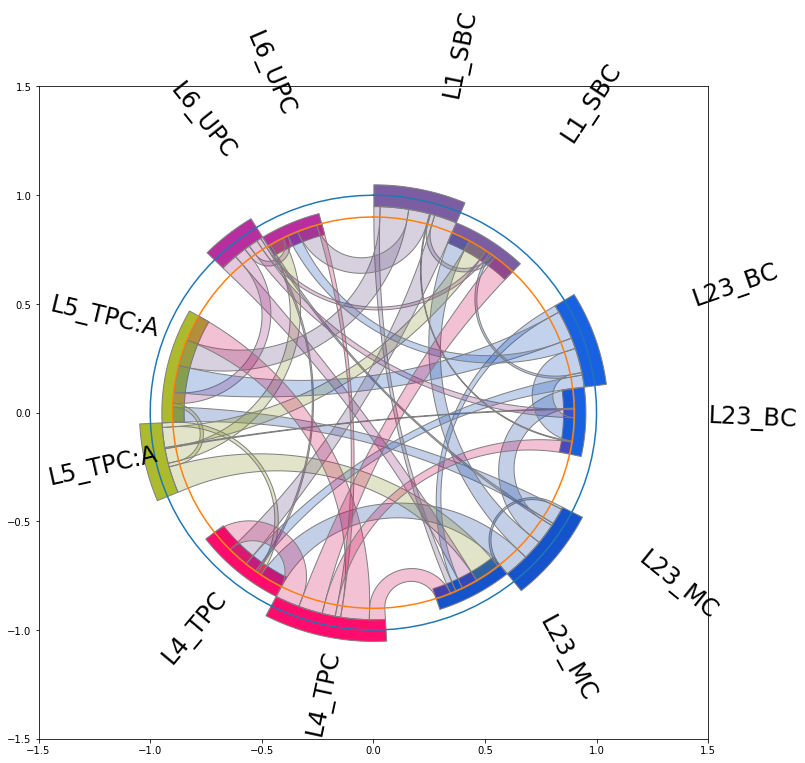

In [5]:
figure = plt.figure(figsize=(14, 14))
print(chart.outer_circle.radius)
chart.draw(draw_diagonal=True)

<Figure size 864x864 with 0 Axes>

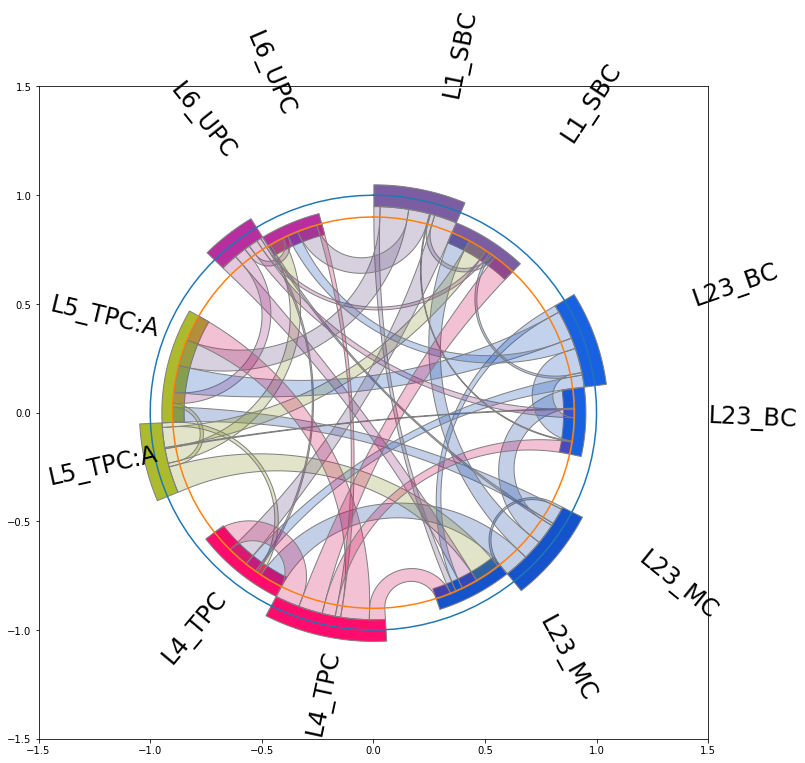

In [6]:
figure = plt.figure(figsize=(12, 12))
chart.draw(draw_diagonal=False)

In [7]:
l23_mc_source = chart.source_geometries["L23_MC"]
l6_upc_target = chart.target_geometries["L6_UPC"]
l23_mc_l6_upc = chart.flow_geometries[(l23_mc_source.label, l6_upc_target.label)]

In [8]:
l23_mc_source.as_dict

{'chart': <dmt.tk.plotting.charts.network.circle.CircularNetworkChart at 0x10cc17350>,
 'children': [],
 'facecolor': array([0.07974847, 0.32729663, 0.79665313]),
 'flow_positions': [(<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbba690>,
   (2.0442000778297063, 2.055021548391321)),
  (<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbba810>,
   (2.055021548391321, 2.133937330291186)),
  (<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbba4d0>,
   (2.133937330291186, 2.1461073396686925)),
  (<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbba710>,
   (2.1461073396686925, 2.246988045574599)),
  (<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbba590>,
   (2.246988045574599, 2.3429338482949644)),
  (<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbba990>,
   (2.3429338482949644, 2.4617009847221913))],
 'flow_weight': 2.951548774504287,
 'label': 'L23_MC',
 'position': PolarPoint(radial=1.0, angular=2.252950531275948

In [9]:
l6_upc_target.as_dict

{'chart': <dmt.tk.plotting.charts.network.circle.CircularNetworkChart at 0x10cc17350>,
 'children': [],
 'facecolor': array([0.72365222, 0.1810636 , 0.61858529]),
 'flow_positions': [(<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbba4d0>,
   (5.7312144731949335, 5.74338448257244)),
  (<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbbac50>,
   (5.74338448257244, 5.815629341782604)),
  (<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbba1d0>,
   (5.815629341782604, 5.841279824020673)),
  (<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbc6850>,
   (5.841279824020673, 5.894903399452549)),
  (<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbc6e50>,
   (5.894903399452549, 5.995624283772097)),
  (<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbcb490>,
   (5.995624283772097, 6.021385919380436))],
 'flow_weight': 2.0513851880219116,
 'label': 'L6_UPC',
 'position': PolarPoint(radial=0.9, angular=5.876300196287685),
 's

In [10]:
l23_mc_l6_upc.as_dict

{'begin_node': <dmt.tk.plotting.charts.network.circle.NodeGeometry at 0x10cc011d0>,
 'chart': <dmt.tk.plotting.charts.network.circle.CircularNetworkChart at 0x10cc17350>,
 'children': [],
 'end_node': <dmt.tk.plotting.charts.network.circle.NodeGeometry at 0x10cb8ed10>,
 'facecolor': array([0.06379878, 0.26183731, 0.6373225 , 0.25      ]),
 'label': 'L23_MC==>L6_UPC',
 'size_begin': 0.012170009377506407,
 'size_end': 0.012170009377506407}

In [11]:
chart.get_flow_position(l23_mc_source, l23_mc_l6_upc)

(2.133937330291186, 2.1461073396686925)

In [12]:
l23_mc_l6_upc.begin_node

In [13]:
l23_mc_source

In [14]:
for l, g in chart.source_geometries.items():
    print(l, g.position)
print("--------------")
for l, g in chart.target_geometries.items():
    print(l, g.position)
    

L1_SBC PolarPoint(radial=1.0, angular=0.19965965187599624)
L23_BC PolarPoint(radial=1.0, angular=1.2344886973540687)
L23_MC PolarPoint(radial=1.0, angular=2.2529505312759484)
L4_TPC PolarPoint(radial=1.0, angular=3.3535619052898706)
L5_TPC:A PolarPoint(radial=1.0, angular=4.492109151339432)
L6_UPC PolarPoint(radial=1.0, angular=5.611204646310545)
--------------
L1_SBC PolarPoint(radial=0.9, angular=0.5809759110083074)
L23_BC PolarPoint(radial=0.9, angular=1.6134730893374611)
L23_MC PolarPoint(radial=0.9, angular=2.6434152743393375)
L4_TPC PolarPoint(radial=0.9, angular=3.8387585271496896)
L5_TPC:A PolarPoint(radial=0.9, angular=4.947246075515725)
L6_UPC PolarPoint(radial=0.9, angular=5.876300196287685)


In [15]:
chart.node_data

,position,size_total,out_flow,position_source,size_source,in_flow,position_target,size_target
L1_SBC,0.381316,0.762633,2.823013,0.199660,0.399319,2.568465,0.580976,0.363313
L23_BC,1.403416,0.757969,2.970019,1.234489,0.420114,2.388488,1.613473,0.337855
L23_MC,2.434665,0.780929,2.951549,2.252951,0.417501,2.569281,2.643415,0.363429
L4_TPC,3.572126,0.970393,3.769957,3.353562,0.533266,3.090299,3.838759,0.437127
L5_TPC:A,4.774259,0.910274,2.445893,4.492109,0.345975,3.989345,4.947246,0.564299
L6_UPC,5.756290,0.530191,1.696834,5.611205,0.240020,2.051385,5.876300,0.290171


In [16]:
(chart.node_data.position_source + chart.node_data.position_target)/2.

L1_SBC      0.390318
L23_BC      1.423981
L23_MC      2.448183
L4_TPC      3.596160
L5_TPC:A    4.719678
L6_UPC      5.743752
dtype: float64

In [17]:
(chart.source_geometries["L23_MC"].position.angular 
 + chart.target_geometries["L23_MC"].position.angular) / 2.

2.448182902807643

In [18]:
chart.target_geometries["L23_MC"].as_dict

{'chart': <dmt.tk.plotting.charts.network.circle.CircularNetworkChart at 0x10cc17350>,
 'children': [],
 'facecolor': array([0.07974847, 0.32729663, 0.79665313]),
 'flow_positions': [(<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbba690>,
   (2.4617009847221905, 2.472522455283805)),
  (<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbba450>,
   (2.472522455283805, 2.602436208192068)),
  (<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbbaf10>,
   (2.602436208192068, 2.6834680024804562)),
  (<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbc6650>,
   (2.6834680024804562, 2.719333082228985)),
  (<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbc6c50>,
   (2.719333082228985, 2.748971672236792)),
  (<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbc6250>,
   (2.748971672236792, 2.825129563956484))],
 'flow_weight': 2.56928107208891,
 'label': 'L23_MC',
 'position': PolarPoint(radial=0.9, angular=2.6434152743393375),


In [19]:
chart.source_geometries["L23_MC"].as_dict

{'chart': <dmt.tk.plotting.charts.network.circle.CircularNetworkChart at 0x10cc17350>,
 'children': [],
 'facecolor': array([0.07974847, 0.32729663, 0.79665313]),
 'flow_positions': [(<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbba690>,
   (2.0442000778297063, 2.055021548391321)),
  (<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbba810>,
   (2.055021548391321, 2.133937330291186)),
  (<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbba4d0>,
   (2.133937330291186, 2.1461073396686925)),
  (<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbba710>,
   (2.1461073396686925, 2.246988045574599)),
  (<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbba590>,
   (2.246988045574599, 2.3429338482949644)),
  (<dmt.tk.plotting.charts.network.circle.FlowGeometry at 0x10cbba990>,
   (2.3429338482949644, 2.4617009847221913))],
 'flow_weight': 2.951548774504287,
 'label': 'L23_MC',
 'position': PolarPoint(radial=1.0, angular=2.252950531275948

In [20]:
chart.node_data

,position,size_total,out_flow,position_source,size_source,in_flow,position_target,size_target
L1_SBC,0.381316,0.762633,2.823013,0.199660,0.399319,2.568465,0.580976,0.363313
L23_BC,1.403416,0.757969,2.970019,1.234489,0.420114,2.388488,1.613473,0.337855
L23_MC,2.434665,0.780929,2.951549,2.252951,0.417501,2.569281,2.643415,0.363429
L4_TPC,3.572126,0.970393,3.769957,3.353562,0.533266,3.090299,3.838759,0.437127
L5_TPC:A,4.774259,0.910274,2.445893,4.492109,0.345975,3.989345,4.947246,0.564299
L6_UPC,5.756290,0.530191,1.696834,5.611205,0.240020,2.051385,5.876300,0.290171


In [21]:
assert all(
    x + y == z
    for (x, y), z in zip(
        zip(chart.node_data.size_source, chart.node_data.size_target),
        chart.node_data.size_total))

AssertionError: 